In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mdtraj as md
from contact_map import ContactMap, ContactFrequency, ContactDifference
import matplotlib as mpl
import numpy as np
import seaborn as sns
import nglview as nv

_ColormakerRegistry()

### Input
 - Step 1 : Please download the traj_file and pdb_file by clicking the link: 
 [Download link](http://nas.mytsai.cc:5000/sharing/dHrYmVmwD)
 - Step 2 : Move the files downloaded to the folder where you run the notebook.

# Figure S7. (a)

In [2]:
pdb_file1 = 'native_fibril_back_40A.pdb'
trj_file1 = 'movie_fibril_back_40A.dcd'
traj1 = md.load(trj_file1, top=pdb_file1, stride=1)
view1 = nv.show_mdtraj(traj1)
view1

NGLWidget(max_frame=5001)

In [3]:
contact_traj1 = md.load(trj_file1, top=pdb_file1, stride=1)
topology1 = contact_traj1.topology

In [4]:
fibril1_CA_all = topology1.select("chainid 0 to 11 and name CA")
monomer1_CA = topology1.select("chainid 12 and name CA")

In [5]:
fibril1_CA_Cter_chA = topology1.select("chainid 0 and residue 26 to 32 and name CA")      
fibril1_CA_Cter_chB = topology1.select("chainid 1 and residue 26 to 32 and name CA")      
fibril1_CA_Cter_chC = topology1.select("chainid 2 and residue 26 to 32 and name CA")      
fibril1_CA_Cter_chD = topology1.select("chainid 3 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chE = topology1.select("chainid 4 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chF = topology1.select("chainid 5 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chG = topology1.select("chainid 6 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chH = topology1.select("chainid 7 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chI = topology1.select("chainid 8 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chJ = topology1.select("chainid 9 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chK = topology1.select("chainid 10 and residue 26 to 32 and name CA")       
fibril1_CA_Cter_chL = topology1.select("chainid 11 and residue 26 to 32 and name CA")       

In [6]:
traj1_contacts = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_all, query=monomer1_CA)
traj1_contacts1 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chA, query=monomer1_CA)
traj1_contacts2 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chB, query=monomer1_CA)
traj1_contacts3 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chC, query=monomer1_CA)
traj1_contacts4 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chD, query=monomer1_CA)
traj1_contacts5 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chE, query=monomer1_CA)
traj1_contacts6 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chF, query=monomer1_CA)
traj1_contacts7 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chG, query=monomer1_CA)
traj1_contacts8 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chH, query=monomer1_CA)
traj1_contacts9 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chI, query=monomer1_CA)
traj1_contacts10 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chJ, query=monomer1_CA)
traj1_contacts11 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chK, query=monomer1_CA)
traj1_contacts12 = ContactFrequency(contact_traj1[4102:],cutoff=0.65, haystack=fibril1_CA_Cter_chL, query=monomer1_CA)

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

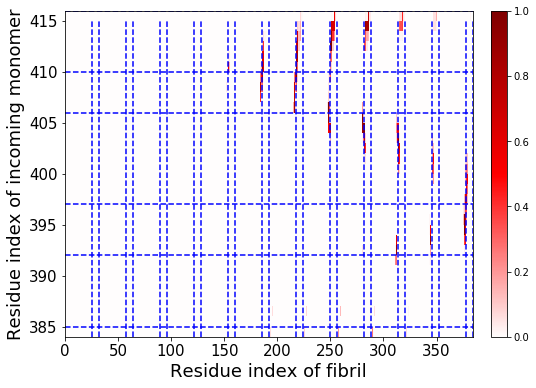

In [7]:
fig, ax = traj1_contacts.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts.haystack_residue_range)
ax.set_ylim(*traj1_contacts.query_residue_range)
for i in np.arange(12):
    ax.vlines(26+i*32, 384, 415, colors = "blue", linestyles = "dashed")
    ax.vlines(32+i*32, 384, 415, colors = "blue", linestyles = "dashed")
ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
plt.xlabel("Residue index of fibril", fontsize=18)
plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Figure S8. (a) chain A

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

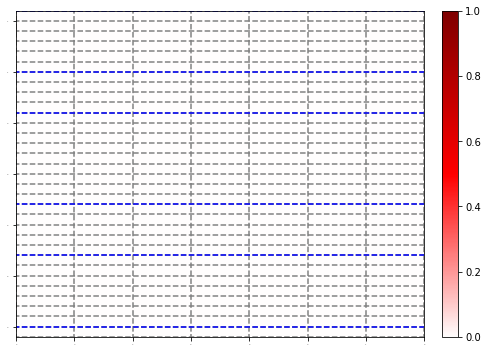

In [8]:
fig, ax = traj1_contacts1.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts1.haystack_residue_range)
ax.set_ylim(*traj1_contacts1.query_residue_range)

for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain A C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain B

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

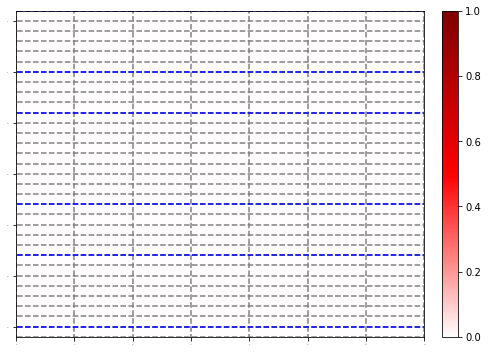

In [9]:
fig, ax = traj1_contacts2.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts2.haystack_residue_range)
ax.set_ylim(*traj1_contacts2.query_residue_range)

for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain B C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain C

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

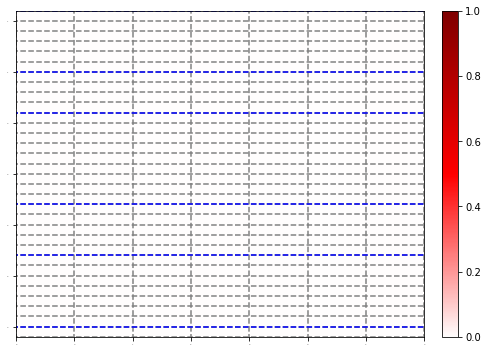

In [10]:
fig, ax = traj1_contacts3.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts3.haystack_residue_range)

ax.set_ylim(*traj1_contacts3.query_residue_range)

for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain C C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain D

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

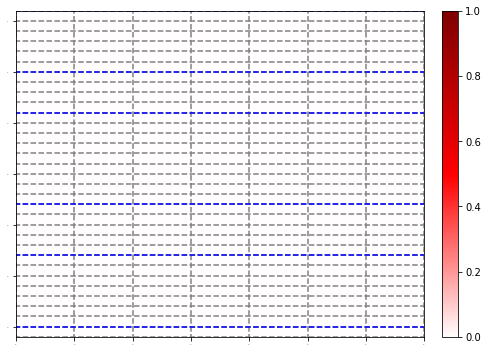

In [11]:
fig, ax = traj1_contacts4.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts4.haystack_residue_range)
ax.set_ylim(*traj1_contacts4.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain D C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain E

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

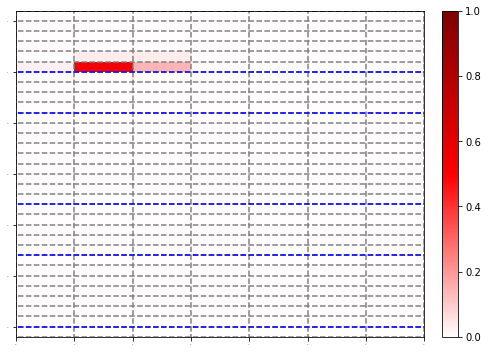

In [12]:
fig, ax = traj1_contacts5.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts5.haystack_residue_range)
#ax.set_xlim(154,161)
ax.set_ylim(*traj1_contacts5.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain E C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain F

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

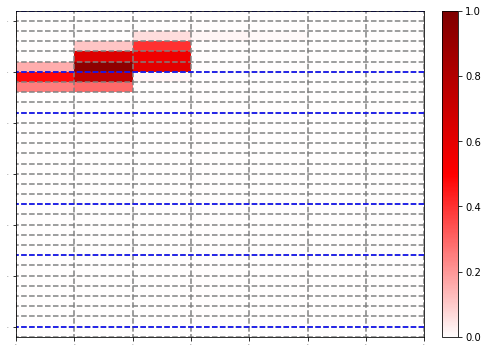

In [13]:
fig, ax = traj1_contacts6.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts6.haystack_residue_range)
ax.set_ylim(*traj1_contacts6.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain F C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain G

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

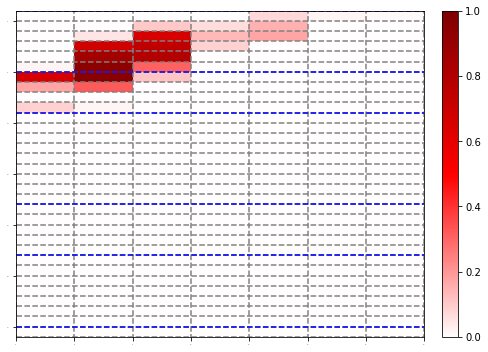

In [14]:
fig, ax = traj1_contacts7.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts7.haystack_residue_range)
ax.set_ylim(*traj1_contacts7.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain G C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain H

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

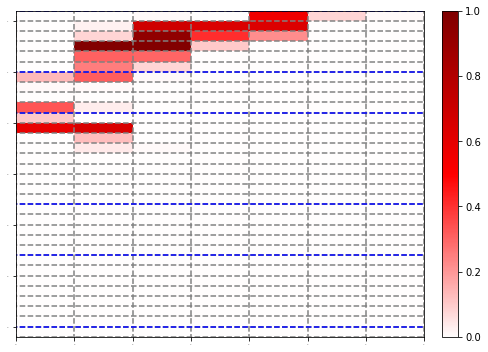

In [15]:
fig, ax = traj1_contacts8.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts8.haystack_residue_range)
ax.set_ylim(*traj1_contacts8.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain H C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain I

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

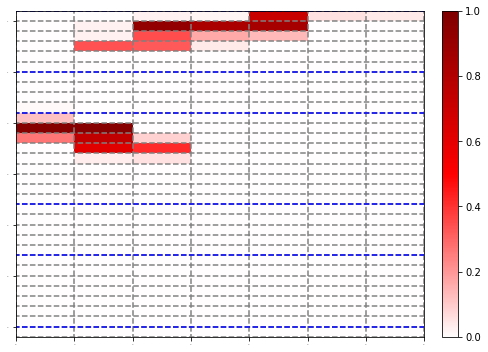

In [16]:
fig, ax = traj1_contacts9.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts9.haystack_residue_range)
ax.set_ylim(*traj1_contacts9.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain I C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain J

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

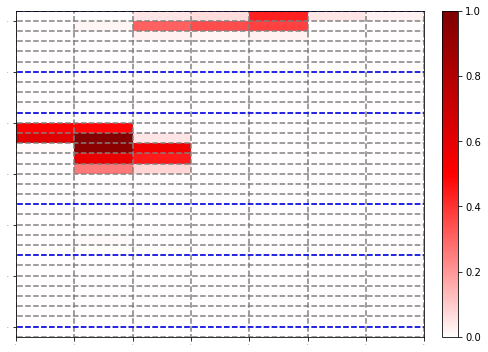

In [17]:
fig, ax = traj1_contacts10.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts10.haystack_residue_range)
ax.set_ylim(*traj1_contacts10.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain J C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain K

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

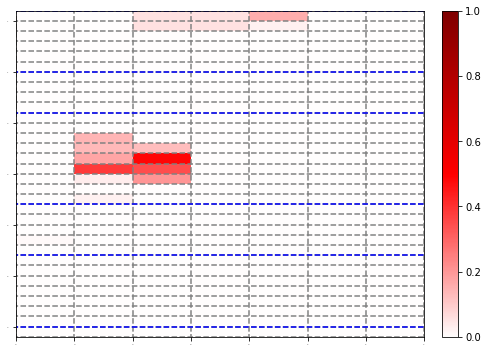

In [18]:
fig, ax = traj1_contacts11.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts11.haystack_residue_range)
ax.set_ylim(*traj1_contacts11.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain K C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (a) chain L

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

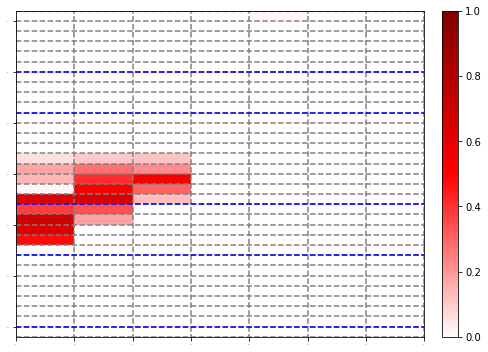

In [19]:
fig, ax = traj1_contacts12.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj1_contacts12.haystack_residue_range)
ax.set_ylim(*traj1_contacts12.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
# plt.xlabel("Residue index of chain L C-ter", fontsize=18)
# plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

# Figure S7. (b)

In [21]:
pdb_file2 = 'native_fibril_back_14A.pdb'
trj_file2 = 'movie_fibril_back_14A.dcd'
traj2 = md.load(trj_file2, top=pdb_file2, stride=1)
view2 = nv.show_mdtraj(traj2)
view2

NGLWidget(max_frame=5001)

In [22]:
contact_traj2 = md.load(trj_file2, top=pdb_file2, stride=1)
topology2 = contact_traj2.topology

In [23]:
fibril2_CA_all = topology2.select("chainid 0 to 11 and name CA")
monomer2_CA = topology2.select("chainid 12 and name CA")

In [24]:
fibril2_CA_Nter_chA = topology2.select("chainid 0 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chB = topology2.select("chainid 1 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chC = topology2.select("chainid 2 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chD = topology2.select("chainid 3 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chE = topology2.select("chainid 4 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chF = topology2.select("chainid 5 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chG = topology2.select("chainid 6 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chH = topology2.select("chainid 7 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chI = topology2.select("chainid 8 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chJ = topology2.select("chainid 9 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chK = topology2.select("chainid 10 and residue 1 to 16 and name CA")       
fibril2_CA_Nter_chL = topology2.select("chainid 11 and residue 1 to 16 and name CA")       

In [25]:
traj2_contacts = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_all, query=monomer2_CA)
traj2_contacts1 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chA, query=monomer2_CA)
traj2_contacts2 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chB, query=monomer2_CA)
traj2_contacts3 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chC, query=monomer2_CA)
traj2_contacts4 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chD, query=monomer2_CA)
traj2_contacts5 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chE, query=monomer2_CA)
traj2_contacts6 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chF, query=monomer2_CA)
traj2_contacts7 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chG, query=monomer2_CA)
traj2_contacts8 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chH, query=monomer2_CA)
traj2_contacts9 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chI, query=monomer2_CA)
traj2_contacts10 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chJ, query=monomer2_CA)
traj2_contacts11 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chK, query=monomer2_CA)
traj2_contacts12 = ContactFrequency(contact_traj2[4102:],cutoff=0.65, haystack=fibril2_CA_Nter_chL, query=monomer2_CA)

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

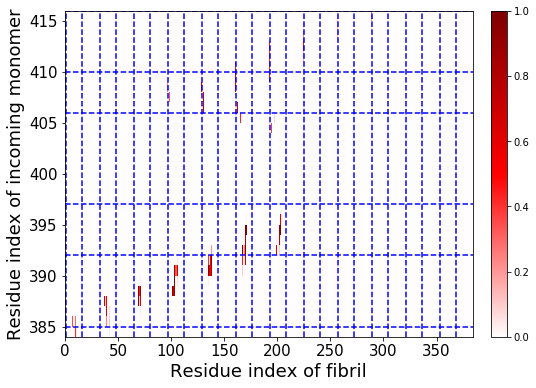

In [26]:
fig, ax = traj2_contacts.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts.haystack_residue_range)
ax.set_ylim(*traj2_contacts.query_residue_range)
for i in np.arange(12):
    ax.vlines(1+i*32, 384, 416, colors = "blue", linestyles = "dashed")
    ax.vlines(16+i*32, 384, 416, colors = "blue", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 416, colors = "blue", linestyles = "dashed")
ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
plt.xlabel("Residue index of fibril", fontsize=18)
plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Figure S8. (b) chain A

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

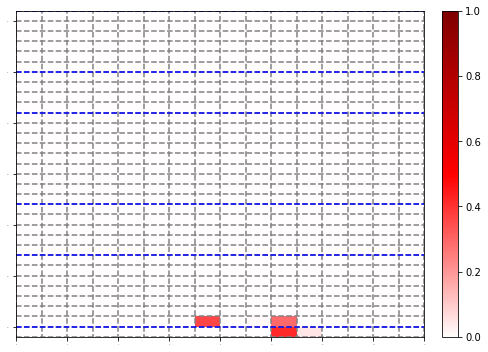

In [27]:
fig, ax = traj2_contacts1.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts1.haystack_residue_range)
ax.set_ylim(*traj2_contacts1.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain A N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain B

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

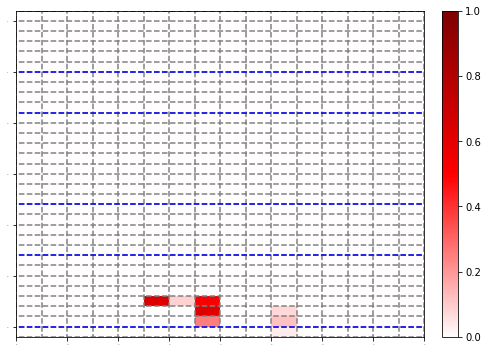

In [28]:
fig, ax = traj2_contacts2.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts2.haystack_residue_range)
ax.set_ylim(*traj2_contacts2.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain B N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain C

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

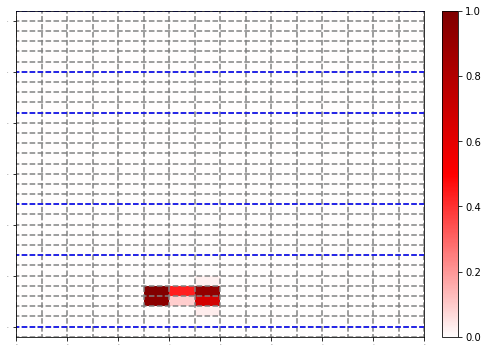

In [29]:
fig, ax = traj2_contacts3.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts3.haystack_residue_range)
ax.set_ylim(*traj2_contacts3.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain C N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain D

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

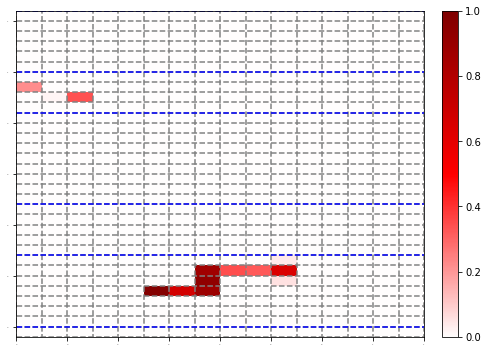

In [30]:
fig, ax = traj2_contacts4.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts4.haystack_residue_range)
ax.set_ylim(*traj2_contacts4.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain D N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain E

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

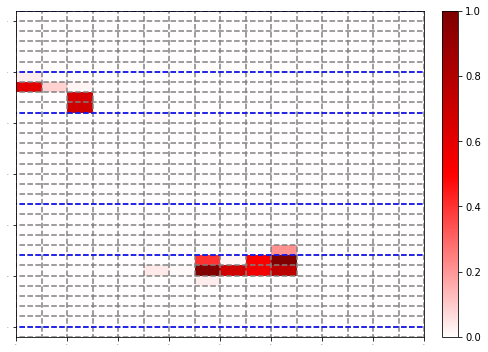

In [31]:
fig, ax = traj2_contacts5.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts5.haystack_residue_range)
ax.set_ylim(*traj2_contacts5.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain E N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain F

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

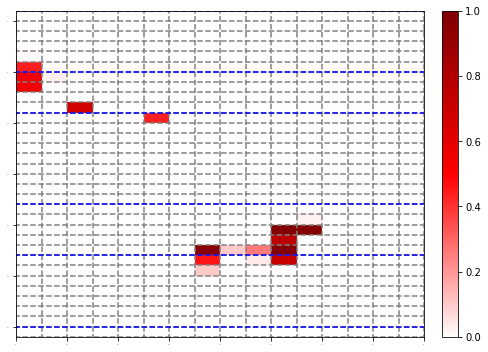

In [32]:
fig, ax = traj2_contacts6.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts6.haystack_residue_range)
ax.set_ylim(*traj2_contacts6.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain F N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain G

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

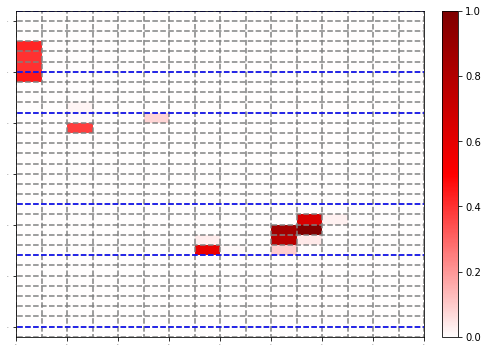

In [33]:
fig, ax = traj2_contacts7.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts7.haystack_residue_range)
ax.set_ylim(*traj2_contacts7.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain G N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain H

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

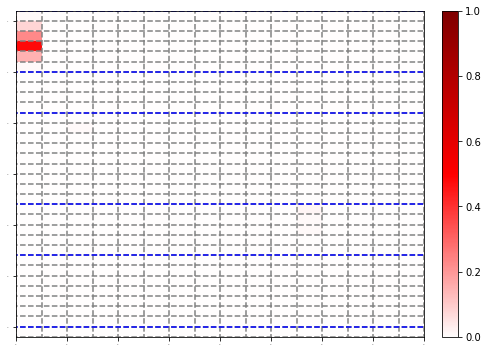

In [34]:
fig, ax = traj2_contacts8.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts8.haystack_residue_range)
ax.set_ylim(*traj2_contacts8.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain H N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain I

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

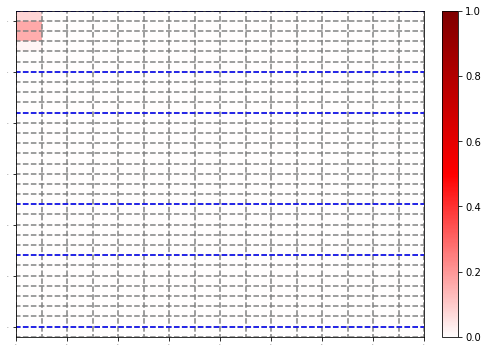

In [35]:
fig, ax = traj2_contacts9.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts9.haystack_residue_range)
ax.set_ylim(*traj2_contacts9.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain I N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain J

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

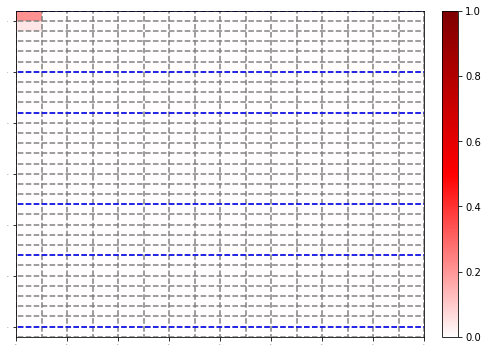

In [36]:
fig, ax = traj2_contacts10.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts10.haystack_residue_range)
ax.set_ylim(*traj2_contacts10.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain J N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain K

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

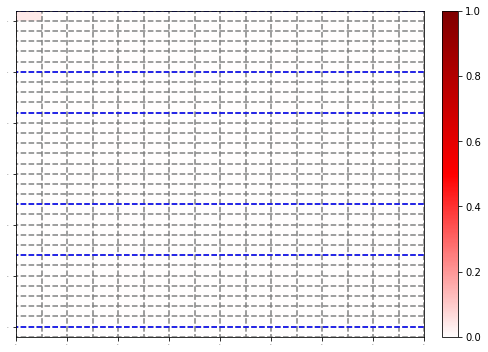

In [37]:
fig, ax = traj2_contacts11.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts11.haystack_residue_range)
ax.set_ylim(*traj2_contacts11.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain K N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (b) chain L

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

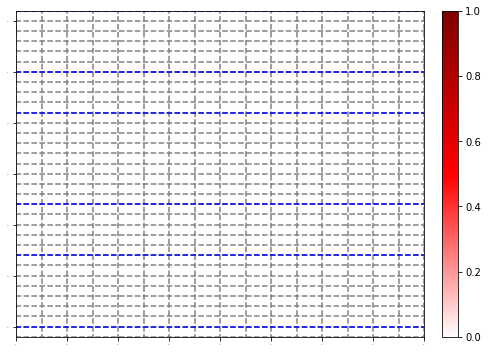

In [38]:
fig, ax = traj2_contacts12.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj2_contacts12.haystack_residue_range)
ax.set_ylim(*traj2_contacts12.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(1+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(8+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain L N-ter", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

# Figure S7. (c)

In [40]:
pdb_file3 = 'native_fibril_back_36A.pdb'
trj_file3 = 'movie_fibril_back_36A.dcd'
traj3 = md.load(trj_file3, top=pdb_file3, stride=1)
view3 = nv.show_mdtraj(traj3)
view3

NGLWidget(max_frame=5001)

In [41]:
contact_traj3 = md.load(trj_file3, top=pdb_file3, stride=1)
topology3 = contact_traj3.topology
fibril3_CA_all = topology3.select("chainid 0 to 11 and name CA")
monomer3_CA = topology3.select("chainid 12 and name CA")

In [42]:
fibril3_CA_chA = topology3.select("chainid 0  and name CA")       
fibril3_CA_chB = topology3.select("chainid 1  and name CA")       
fibril3_CA_chC = topology3.select("chainid 2  and name CA")       
fibril3_CA_chD = topology3.select("chainid 3  and name CA")       
fibril3_CA_chE = topology3.select("chainid 4  and name CA")       
fibril3_CA_chF = topology3.select("chainid 5  and name CA")       
fibril3_CA_chG = topology3.select("chainid 6  and name CA")       
fibril3_CA_chH = topology3.select("chainid 7  and name CA")       
fibril3_CA_chI = topology3.select("chainid 8  and name CA")       
fibril3_CA_chJ = topology3.select("chainid 9  and name CA")       
fibril3_CA_chK = topology3.select("chainid 10  and name CA")       
fibril3_CA_chL = topology3.select("chainid 11  and name CA")       

In [43]:
traj3_contacts = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_all, query=monomer3_CA)
traj3_contacts1 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chA, query=monomer3_CA)
traj3_contacts2 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chB, query=monomer3_CA)
traj3_contacts3 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chC, query=monomer3_CA)
traj3_contacts4 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chD, query=monomer3_CA)
traj3_contacts5 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chE, query=monomer3_CA)
traj3_contacts6 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chF, query=monomer3_CA)
traj3_contacts7 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chG, query=monomer3_CA)
traj3_contacts8 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chH, query=monomer3_CA)
traj3_contacts9 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chI, query=monomer3_CA)
traj3_contacts10 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chJ, query=monomer3_CA)
traj3_contacts11 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chK, query=monomer3_CA)
traj3_contacts12 = ContactFrequency(contact_traj3[4102:],cutoff=0.65, haystack=fibril3_CA_chL, query=monomer3_CA)

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

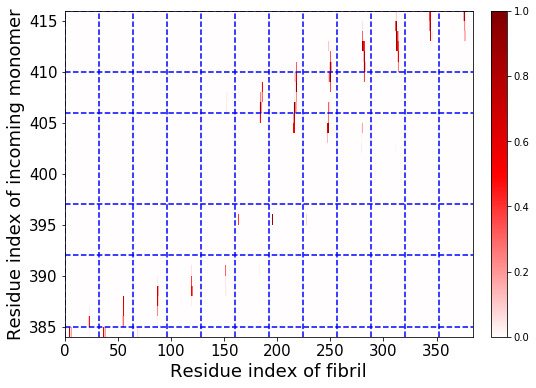

In [44]:
fig, ax = traj3_contacts.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts.haystack_residue_range)
ax.set_ylim(*traj3_contacts.query_residue_range)
##haystack(352, 384)  query(384, 416)
# ax.vlines(0, 384, 416, colors = "blue", linestyles = "dashed")      
# ax.vlines(32, 384, 416, colors = "blue", linestyles = "dashed")
# ax.vlines(352, 384, 416, colors = "blue", linestyles = "dashed")
# ax.vlines(384, 384, 416, colors = "blue", linestyles = "dashed")
for i in np.arange(12):
    ax.vlines(0+i*32, 384, 416, colors = "blue", linestyles = "dashed")
ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
plt.xlabel("Residue index of fibril", fontsize=18)
plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Figure S8. (c) chain A

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

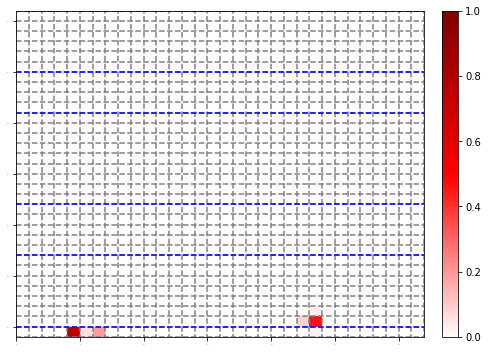

In [45]:
fig, ax = traj3_contacts1.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts1.haystack_residue_range)
ax.set_ylim(*traj3_contacts1.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain A", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain B

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

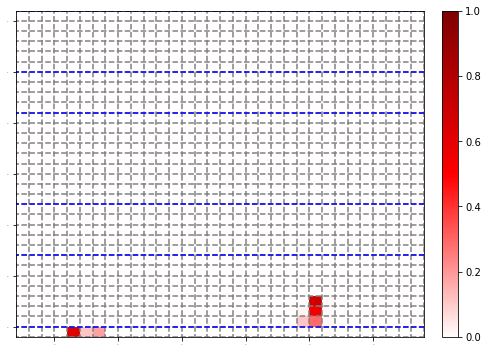

In [46]:
fig, ax = traj3_contacts2.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts2.haystack_residue_range)
ax.set_ylim(*traj3_contacts2.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain B", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain C

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

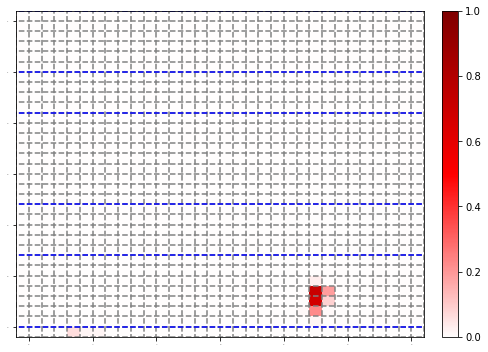

In [47]:
fig, ax = traj3_contacts3.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts3.haystack_residue_range)
#ax.set_xlim(90,97)
ax.set_ylim(*traj3_contacts3.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain C", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain D

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

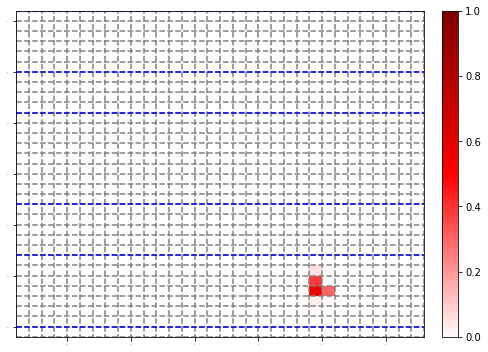

In [48]:
fig, ax = traj3_contacts4.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts4.haystack_residue_range)
ax.set_ylim(*traj3_contacts4.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain D", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain E

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

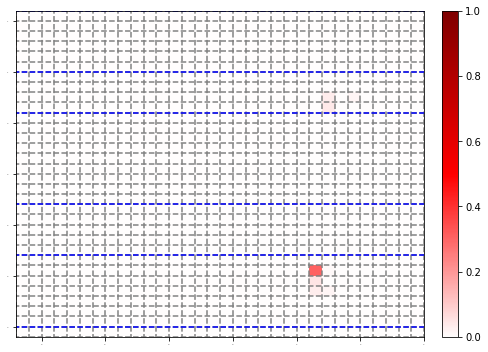

In [49]:
fig, ax = traj3_contacts5.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts5.haystack_residue_range)
#ax.set_xlim(154,161)
ax.set_ylim(*traj3_contacts5.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain E", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain F

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

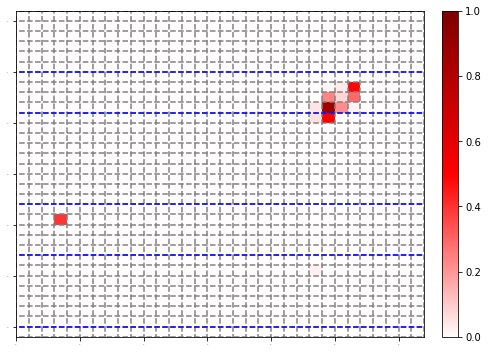

In [50]:
fig, ax = traj3_contacts6.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts6.haystack_residue_range)
ax.set_ylim(*traj3_contacts6.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain F", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain G

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

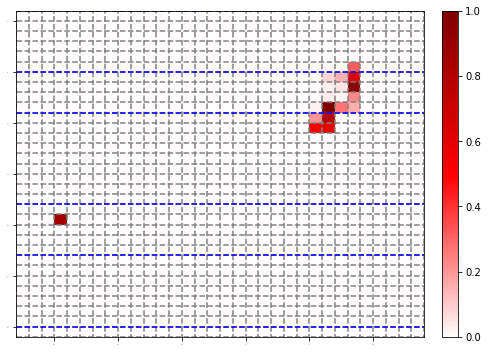

In [51]:
fig, ax = traj3_contacts7.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts7.haystack_residue_range)
ax.set_ylim(*traj3_contacts7.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain G", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain H

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

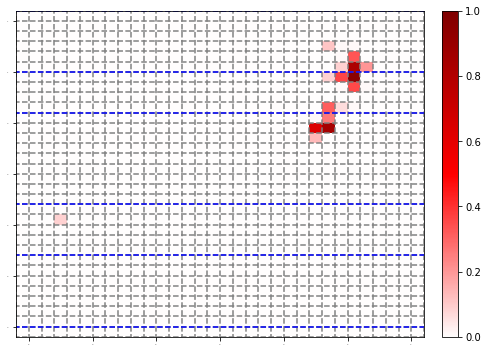

In [52]:
fig, ax = traj3_contacts8.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts8.haystack_residue_range)
ax.set_ylim(*traj3_contacts8.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain H", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain I

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

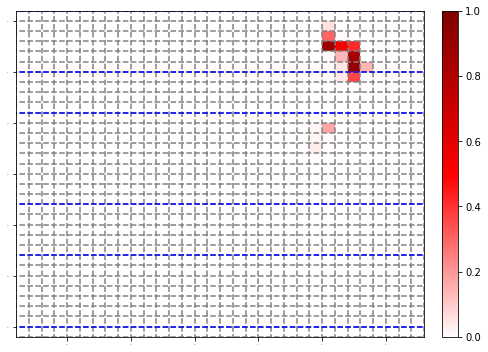

In [53]:
fig, ax = traj3_contacts9.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts9.haystack_residue_range)
ax.set_ylim(*traj3_contacts9.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain I", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain J

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

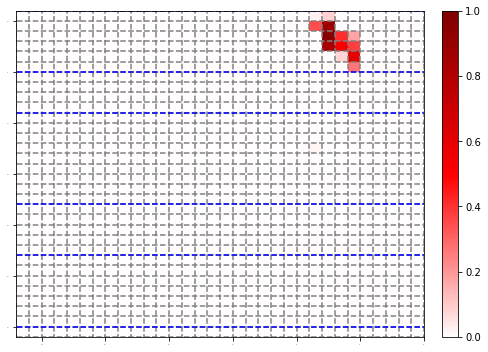

In [54]:
fig, ax = traj3_contacts10.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts10.haystack_residue_range)
ax.set_ylim(*traj3_contacts10.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain J", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain K

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

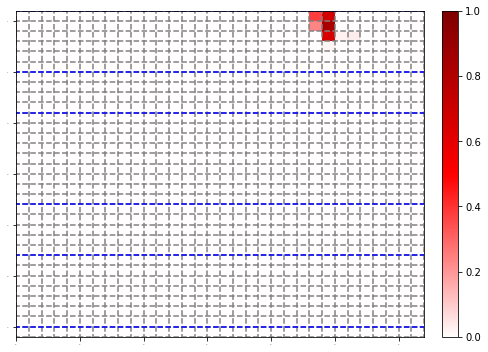

In [55]:
fig, ax = traj3_contacts11.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts11.haystack_residue_range)
ax.set_ylim(*traj3_contacts11.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain K", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (c) chain L

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

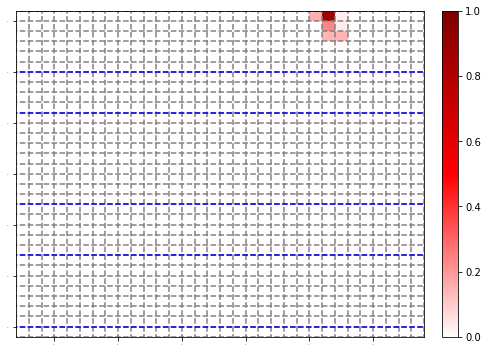

In [56]:
fig, ax = traj3_contacts12.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj3_contacts12.haystack_residue_range)
ax.set_ylim(*traj3_contacts12.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain L", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

# Figure S7. (d)

In [58]:
pdb_file4 = 'native_fibril_back_54A.pdb'
trj_file4 = 'movie_fibril_back_54A.dcd'
traj4 = md.load(trj_file4, top=pdb_file4, stride=1)
view4 = nv.show_mdtraj(traj4)
view4

NGLWidget(max_frame=5001)

In [59]:
contact_traj4 = md.load(trj_file4, top=pdb_file4, stride=1)
topology4 = contact_traj4.topology
fibril4_CA_all = topology4.select("chainid 0 to 11 and name CA")
monomer4_CA = topology4.select("chainid 12 and name CA")

In [60]:
fibril4_CA_chA = topology4.select("chainid 0  and name CA")       
fibril4_CA_chB = topology4.select("chainid 1  and name CA")       
fibril4_CA_chC = topology4.select("chainid 2  and name CA")       
fibril4_CA_chD = topology4.select("chainid 3  and name CA")       
fibril4_CA_chE = topology4.select("chainid 4  and name CA")       
fibril4_CA_chF = topology4.select("chainid 5  and name CA")       
fibril4_CA_chG = topology4.select("chainid 6  and name CA")       
fibril4_CA_chH = topology4.select("chainid 7  and name CA")       
fibril4_CA_chI = topology4.select("chainid 8  and name CA")       
fibril4_CA_chJ = topology4.select("chainid 9  and name CA")       
fibril4_CA_chK = topology4.select("chainid 10  and name CA")       
fibril4_CA_chL = topology4.select("chainid 11  and name CA")       

In [61]:
traj4_contacts = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_all, query=monomer4_CA)
traj4_contacts1 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chA, query=monomer4_CA)
traj4_contacts2 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chB, query=monomer4_CA)
traj4_contacts3 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chC, query=monomer4_CA)
traj4_contacts4 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chD, query=monomer4_CA)
traj4_contacts5 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chE, query=monomer4_CA)
traj4_contacts6 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chF, query=monomer4_CA)
traj4_contacts7 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chG, query=monomer4_CA)
traj4_contacts8 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chH, query=monomer4_CA)
traj4_contacts9 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chI, query=monomer4_CA)
traj4_contacts10 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chJ, query=monomer4_CA)
traj4_contacts11 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chK, query=monomer4_CA)
traj4_contacts12 = ContactFrequency(contact_traj4[4102:],cutoff=0.65, haystack=fibril4_CA_chL, query=monomer4_CA)

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

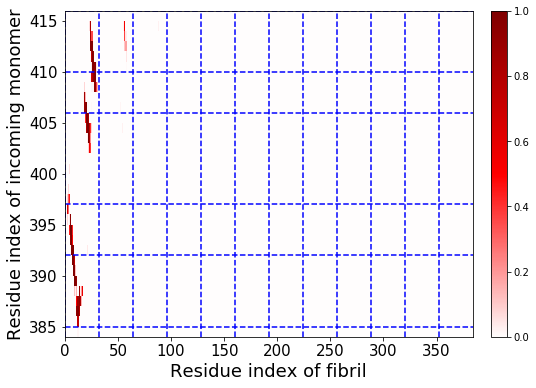

In [62]:
fig, ax = traj4_contacts.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts.haystack_residue_range)
ax.set_ylim(*traj4_contacts.query_residue_range)
##haystack(352, 384)  query(384, 416)
# ax.vlines(0, 384, 416, colors = "blue", linestyles = "dashed")      
# ax.vlines(32, 384, 416, colors = "blue", linestyles = "dashed")
# ax.vlines(352, 384, 416, colors = "blue", linestyles = "dashed")
# ax.vlines(384, 384, 416, colors = "blue", linestyles = "dashed")
for i in np.arange(12):
    ax.vlines(0+i*32, 384, 416, colors = "blue", linestyles = "dashed")
ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
plt.xlabel("Residue index of fibril", fontsize=18)
plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Figure S8. (d) chain A

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

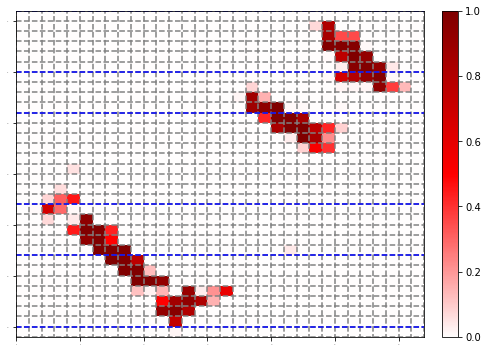

In [63]:
fig, ax = traj4_contacts1.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts1.haystack_residue_range)
ax.set_ylim(*traj4_contacts1.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain A", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain B

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

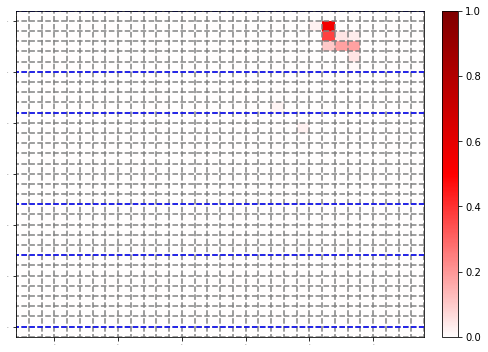

In [64]:
fig, ax = traj4_contacts2.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts2.haystack_residue_range)
ax.set_ylim(*traj4_contacts2.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain B", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain C

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

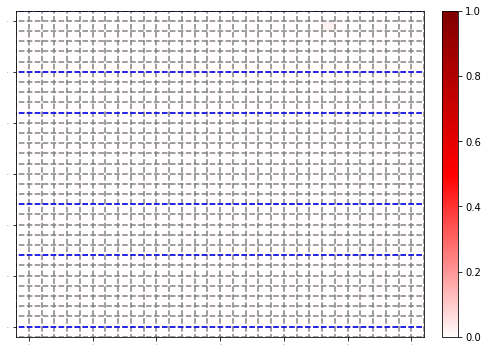

In [65]:
fig, ax = traj4_contacts3.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts3.haystack_residue_range)
#ax.set_xlim(90,97)
ax.set_ylim(*traj4_contacts3.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain C", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain D

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

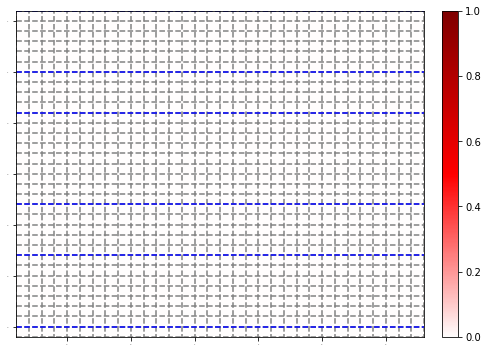

In [66]:
fig, ax = traj4_contacts4.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts4.haystack_residue_range)
ax.set_ylim(*traj4_contacts4.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain D", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain E

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

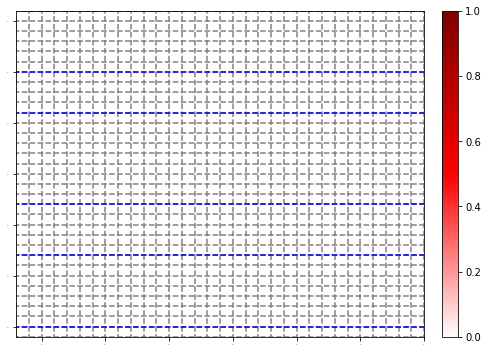

In [67]:
fig, ax = traj4_contacts5.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts5.haystack_residue_range)
#ax.set_xlim(154,161)
ax.set_ylim(*traj4_contacts5.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain E", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain F

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

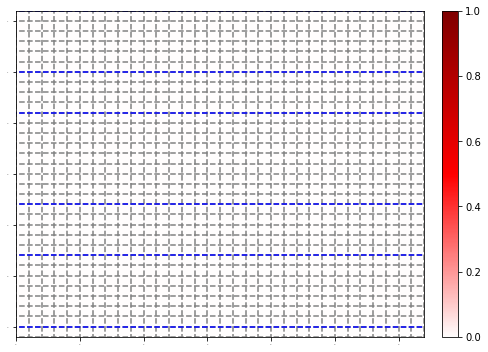

In [68]:
fig, ax = traj4_contacts6.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts6.haystack_residue_range)
ax.set_ylim(*traj4_contacts6.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain F", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain G

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

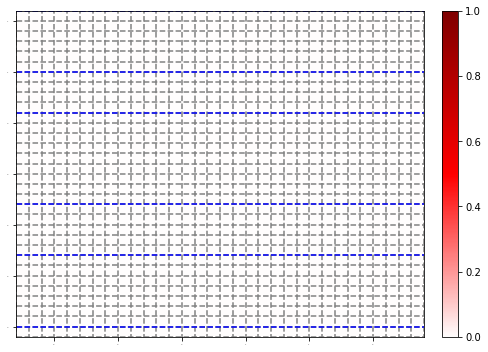

In [69]:
fig, ax = traj4_contacts7.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts7.haystack_residue_range)
ax.set_ylim(*traj4_contacts7.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain G", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain H

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

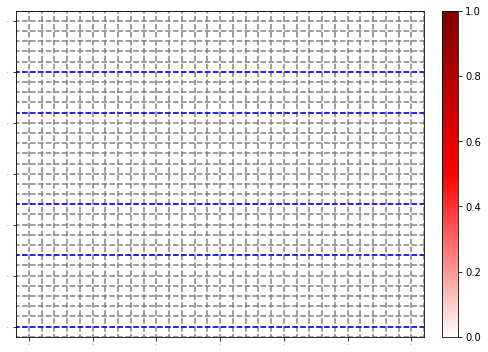

In [70]:
fig, ax = traj4_contacts8.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts8.haystack_residue_range)
ax.set_ylim(*traj4_contacts8.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain H", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain I

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

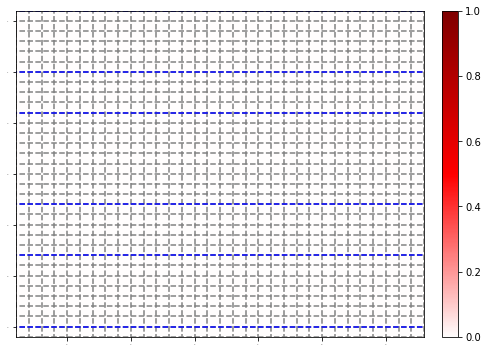

In [71]:
fig, ax = traj4_contacts9.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts9.haystack_residue_range)
ax.set_ylim(*traj4_contacts9.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain I", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain J

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

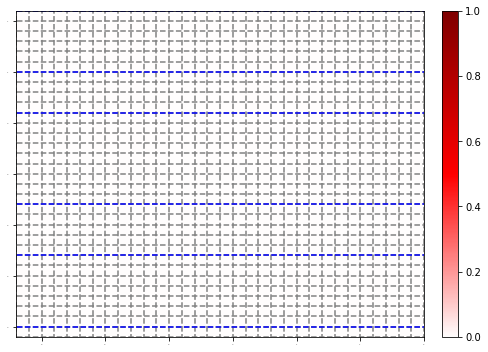

In [72]:
fig, ax = traj4_contacts10.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts10.haystack_residue_range)
ax.set_ylim(*traj4_contacts10.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain J", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain K

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

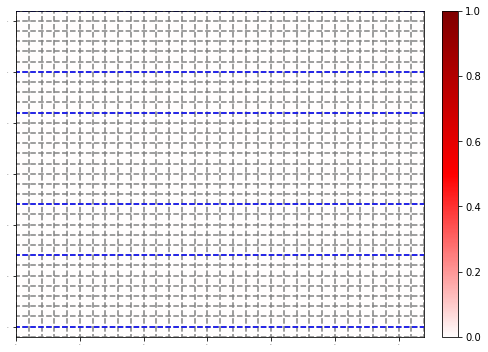

In [73]:
fig, ax = traj4_contacts11.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts11.haystack_residue_range)
ax.set_ylim(*traj4_contacts11.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain K", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (d) chain L

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

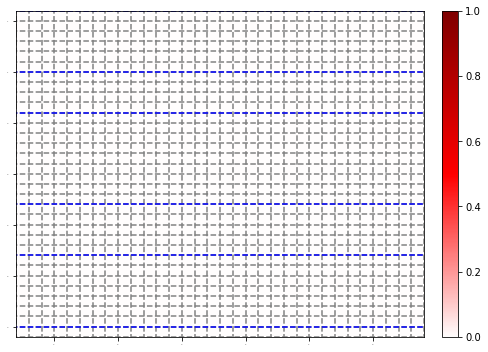

In [74]:
fig, ax = traj4_contacts12.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj4_contacts12.haystack_residue_range)
ax.set_ylim(*traj4_contacts12.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain L", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

# Figure S7. (e)

In [76]:
pdb_file5 = 'native_fibril_back_38A.pdb'
trj_file5 = 'movie_fibril_back_38A.dcd'
traj5 = md.load(trj_file5, top=pdb_file5, stride=1)
view5 = nv.show_mdtraj(traj5)
view5

NGLWidget(max_frame=5001)

In [77]:
contact_traj5 = md.load(trj_file5, top=pdb_file5, stride=1)
topology5 = contact_traj5.topology
fibril5_CA_all = topology5.select("chainid 0 to 11 and name CA")
monomer5_CA = topology5.select("chainid 12 and name CA")

In [78]:
fibril5_CA_chA = topology5.select("chainid 0  and name CA")       
fibril5_CA_chB = topology5.select("chainid 1  and name CA")       
fibril5_CA_chC = topology5.select("chainid 2  and name CA")       
fibril5_CA_chD = topology5.select("chainid 3  and name CA")       
fibril5_CA_chE = topology5.select("chainid 4  and name CA")       
fibril5_CA_chF = topology5.select("chainid 5  and name CA")       
fibril5_CA_chG = topology5.select("chainid 6  and name CA")       
fibril5_CA_chH = topology5.select("chainid 7  and name CA")       
fibril5_CA_chI = topology5.select("chainid 8  and name CA")       
fibril5_CA_chJ = topology5.select("chainid 9  and name CA")       
fibril5_CA_chK = topology5.select("chainid 10  and name CA")       
fibril5_CA_chL = topology5.select("chainid 11  and name CA")       

In [79]:
traj5_contacts = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_all, query=monomer5_CA)
traj5_contacts1 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chA, query=monomer5_CA)
traj5_contacts2 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chB, query=monomer5_CA)
traj5_contacts3 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chC, query=monomer5_CA)
traj5_contacts4 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chD, query=monomer5_CA)
traj5_contacts5 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chE, query=monomer5_CA)
traj5_contacts6 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chF, query=monomer5_CA)
traj5_contacts7 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chG, query=monomer5_CA)
traj5_contacts8 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chH, query=monomer5_CA)
traj5_contacts9 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chI, query=monomer5_CA)
traj5_contacts10 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chJ, query=monomer5_CA)
traj5_contacts11 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chK, query=monomer5_CA)
traj5_contacts12 = ContactFrequency(contact_traj5[4102:],cutoff=0.65, haystack=fibril5_CA_chL, query=monomer5_CA)

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

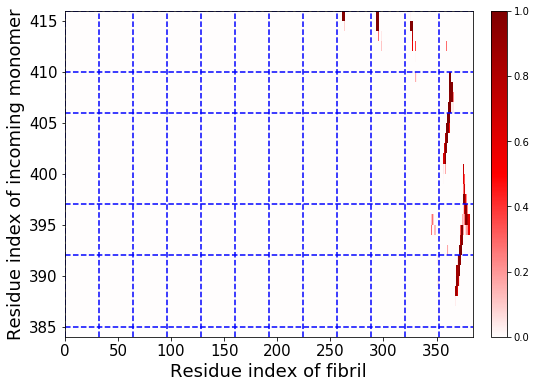

In [80]:
fig, ax = traj5_contacts.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts.haystack_residue_range)
ax.set_ylim(*traj5_contacts.query_residue_range)
##haystack(352, 384)  query(384, 416)
# ax.vlines(0, 384, 416, colors = "blue", linestyles = "dashed")      
# ax.vlines(32, 384, 416, colors = "blue", linestyles = "dashed")
# ax.vlines(352, 384, 416, colors = "blue", linestyles = "dashed")
# ax.vlines(384, 384, 416, colors = "blue", linestyles = "dashed")
for i in np.arange(12):
    ax.vlines(0+i*32, 384, 416, colors = "blue", linestyles = "dashed")
ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
plt.xlabel("Residue index of fibril", fontsize=18)
plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Figure S8. (e) chain A

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

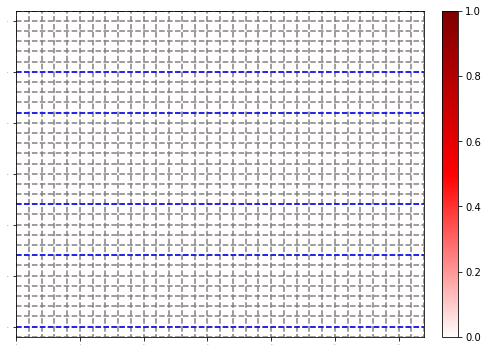

In [81]:
fig, ax = traj5_contacts1.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts1.haystack_residue_range)
ax.set_ylim(*traj5_contacts1.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain A", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain B

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

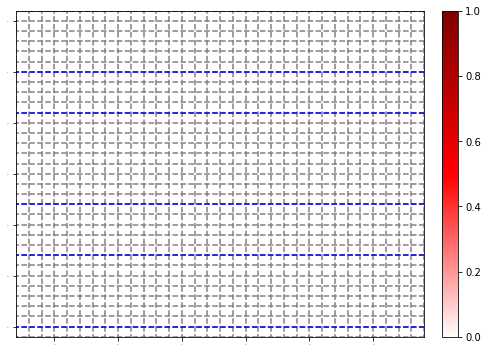

In [82]:
fig, ax = traj5_contacts2.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts2.haystack_residue_range)
ax.set_ylim(*traj5_contacts2.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain B", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain C

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

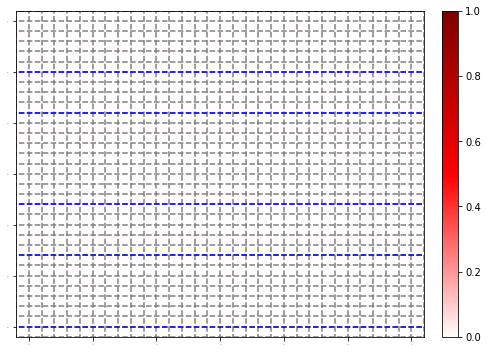

In [83]:
fig, ax = traj5_contacts3.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts3.haystack_residue_range)
#ax.set_xlim(90,97)
ax.set_ylim(*traj5_contacts3.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain C", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain D

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

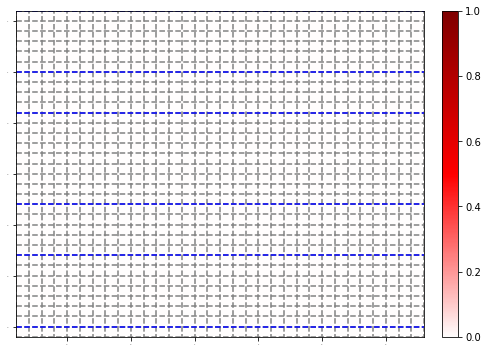

In [84]:
fig, ax = traj5_contacts4.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts4.haystack_residue_range)
ax.set_ylim(*traj5_contacts4.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain D", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain E

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

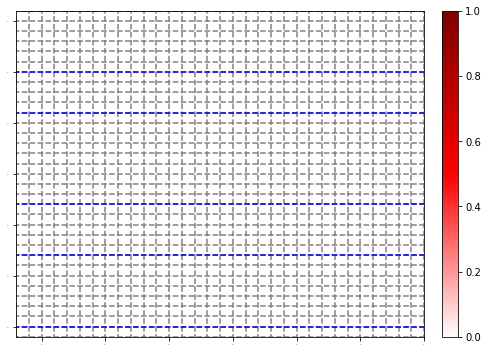

In [85]:
fig, ax = traj5_contacts5.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts5.haystack_residue_range)
#ax.set_xlim(154,161)
ax.set_ylim(*traj5_contacts5.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain E", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain F

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

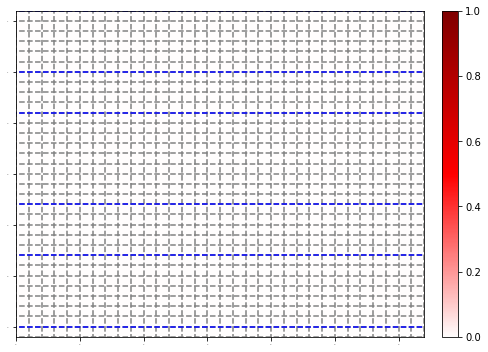

In [86]:
fig, ax = traj5_contacts6.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts6.haystack_residue_range)
ax.set_ylim(*traj5_contacts6.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain F", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain G

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

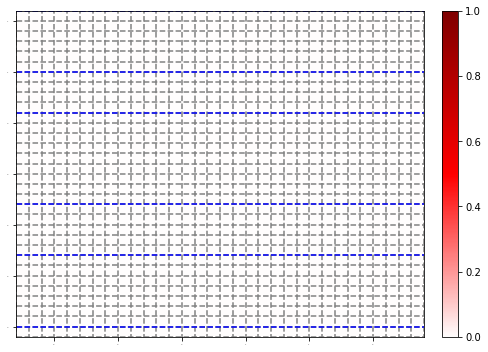

In [87]:
fig, ax = traj5_contacts7.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts7.haystack_residue_range)
ax.set_ylim(*traj5_contacts7.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain G", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain H

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

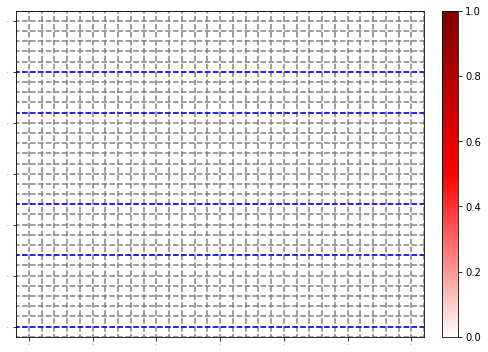

In [88]:
fig, ax = traj5_contacts8.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts8.haystack_residue_range)
ax.set_ylim(*traj5_contacts8.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain H", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain I

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

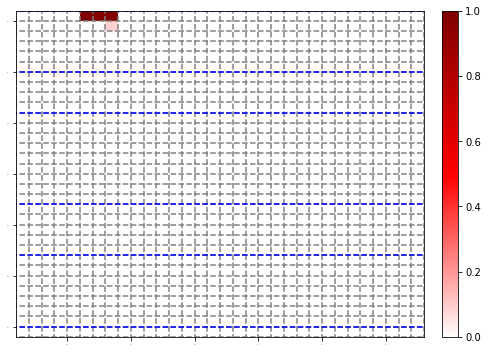

In [89]:
fig, ax = traj5_contacts9.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts9.haystack_residue_range)
ax.set_ylim(*traj5_contacts9.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain I", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain J

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

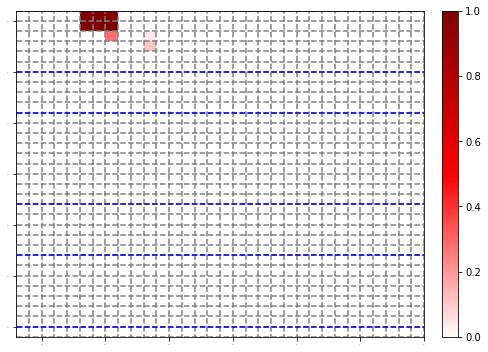

In [90]:
fig, ax = traj5_contacts10.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts10.haystack_residue_range)
ax.set_ylim(*traj5_contacts10.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain J", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain K

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

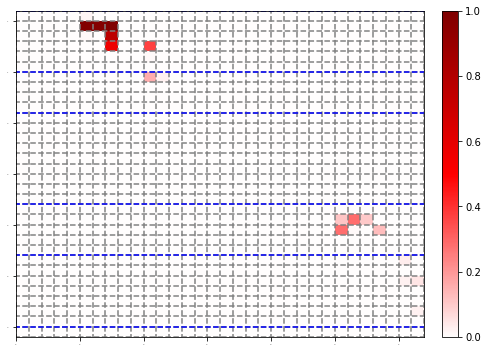

In [91]:
fig, ax = traj5_contacts11.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts11.haystack_residue_range)
ax.set_ylim(*traj5_contacts11.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain K", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)

## Figure S8. (e) chain L

(array([380., 385., 390., 395., 400., 405., 410., 415., 420.]),
 <a list of 9 Text yticklabel objects>)

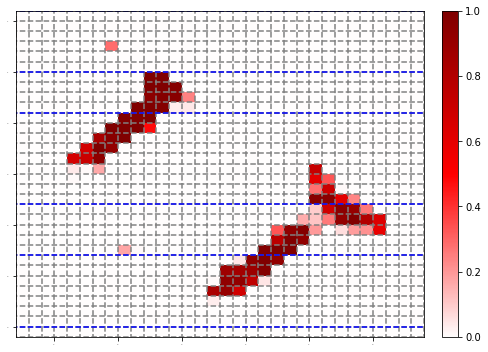

In [92]:
fig, ax = traj5_contacts12.residue_contacts.plot(cmap='seismic', vmin=-1, vmax=1, figsize=(8, 6))
ax.set_xlim(*traj5_contacts12.haystack_residue_range)
ax.set_ylim(*traj5_contacts12.query_residue_range)
# for i in np.arange(12):
#     ax.vlines(26+i*32, 384, 415, colors = "gray", linestyles = "dashed")
#     ax.vlines(32+i*32, 384, 415, colors = "gray", linestyles = "dashed")
for i in np.arange(416):
    ax.vlines(i, 0, 416, colors = "gray", linestyles = "dashed")
    ax.hlines(i, 0, 416, colors = "gray", linestyles = "dashed")

ax.hlines(416, 0, 384, colors = "blue", linestyles = "dashed")
ax.hlines(416-6, 0, 384, colors = "blue", linestyles = "dashed")          #beta strand 3 have 7 residue
ax.hlines(416-10, 0, 384, colors = "blue", linestyles = "dashed")           #4 on loop2
ax.hlines(416-19, 0, 384, colors = "blue", linestyles = "dashed")           #9 on strand2
ax.hlines(416-24, 0, 384, colors = "blue", linestyles = "dashed")           #5 on loop1 
ax.hlines(416-31, 0, 384, colors = "blue", linestyles = "dashed")           #7 on strand1
#plt.xlabel("Residue index of chain L", fontsize=18)
#plt.ylabel("Residue index of incoming monomer", fontsize=18)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)